In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position

In [2]:
lm_dset, lm_paths = kex_data.listmode()



In [44]:
fov_image = {}
small_limos = {}
keys = ['cylinder 0', 'cylinder 1', 'kanyl 0', 'kanyl 1']
for i, key in enumerate(keys):
    small_limos[key] = lm_dset[i][:100000]
    fov_image[key] = listmode.get_fov_image_bins(small_limos[key])

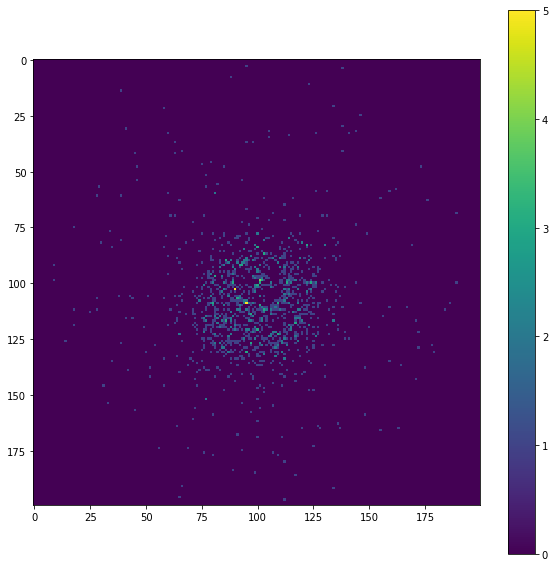

old [[  6   3   0]
 [548 171 159]
 [ 69 142   1]
 [276 171 198]]
new [[  6   5   2]
 [547 170 160]
 [ 69 142   1]
 [307 184 199]]
(4, 87180)
(3, 84685)


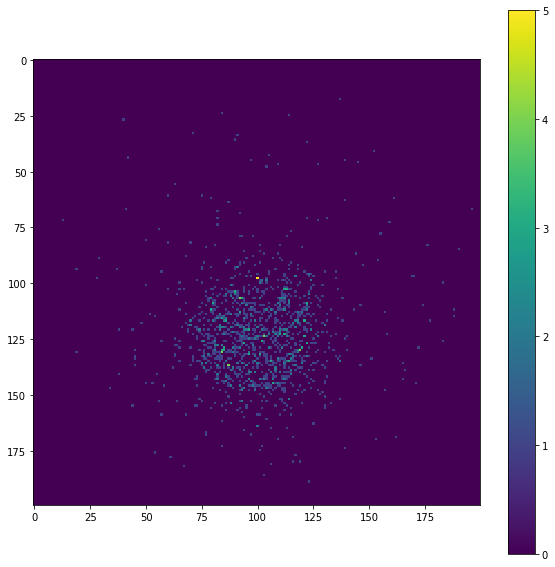

In [314]:
importlib.reload(kex_headers)
importlib.reload(representation)


d = fov_image['cylinder 1']  
toflor = d['tof_lor'][:, d['is_prompt']]
ibins = representation.get_img_bins2(toflor)

shape = kex_headers.IMAGE_SHAPE
is_fov = listmode.is_fov(ibins, shape)
histo_img_a = listmode.get_histogram(ibins[:, is_fov], shape)
plt.figure(figsize=(10,10))
plt.imshow(histo_img_a[47])
plt.colorbar()
plt.show()

toflor2,is_fov2 = representation.move_translation(toflor, [0,60,0], verbose=False)
print("old", toflor[:, :3] )
print("new", toflor2[:, :3])
print(toflor2.shape)
ibins2 = representation.get_img_bins2(toflor2[:,is_fov2])
print(ibins2.shape)
histo_img_b = listmode.get_histogram(ibins2[:,  listmode.is_fov(ibins2, kex_headers.IMAGE_SHAPE)], shape)
plt.figure(figsize=(10,10))
plt.imshow(histo_img_b[47])
plt.colorbar()
plt.show()

In [313]:
print("source toflor that were problematic", toflor[1, is_fov2 == False])
print("that is, mapped to toflor outside fov", toflor2[1, is_fov2 == False])

source toflor that were problematic [155  61 121 ... 224 305 164]
that is, mapped to toflor outside fov [157  61 119 ... 224 301 163]


In [221]:
norms, _ = kex_data.get_norm_factors()
norms = dict(zip(keys, norms))

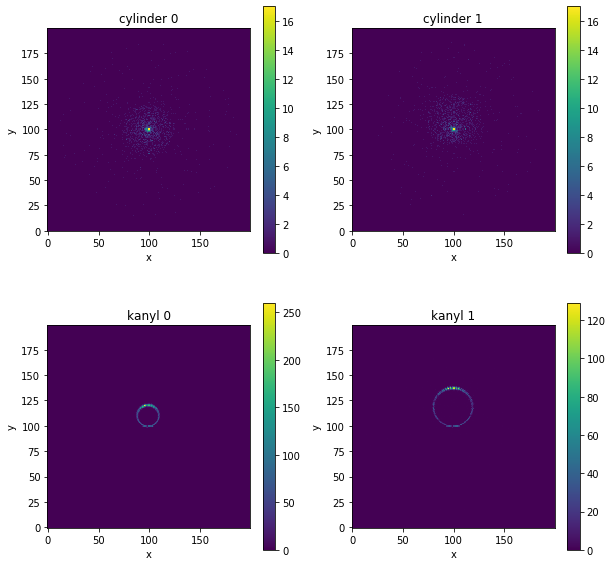

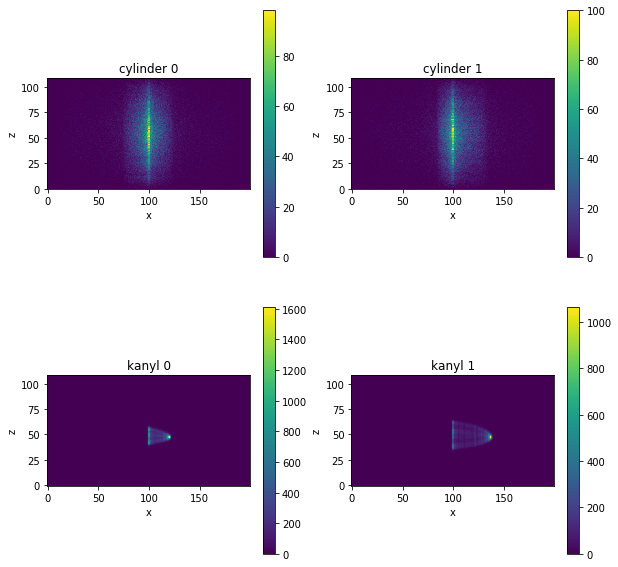

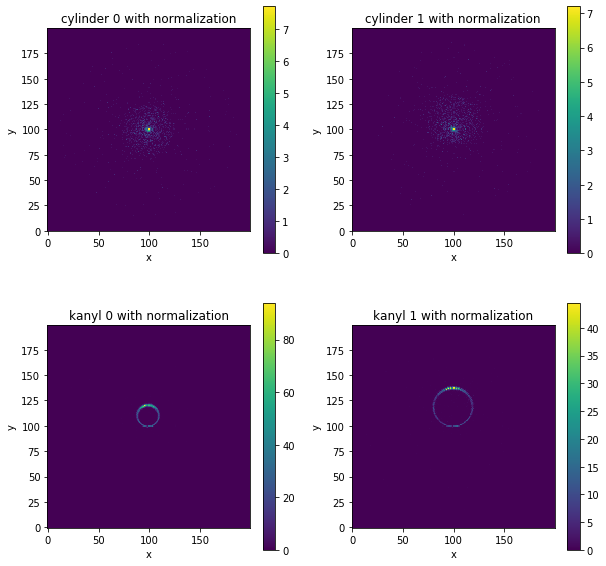

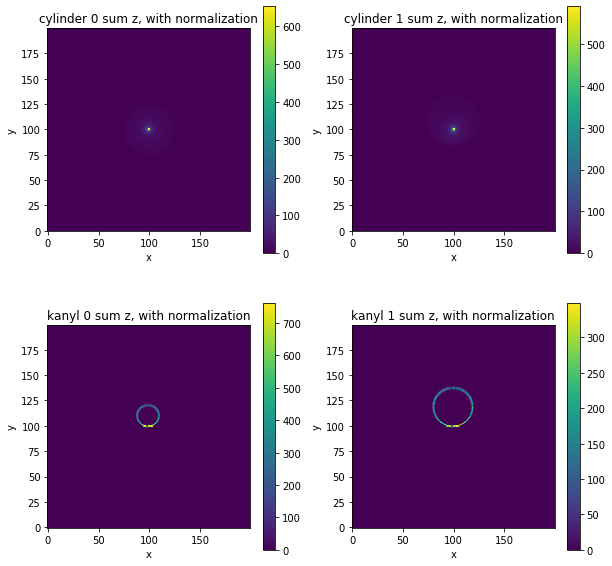

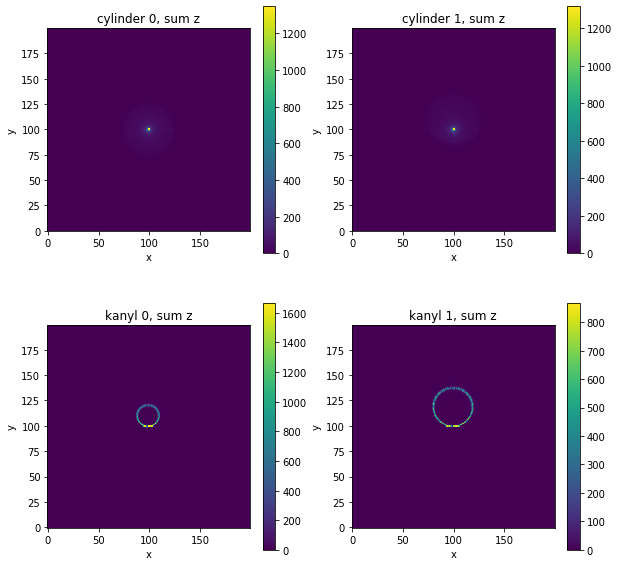

In [285]:
x

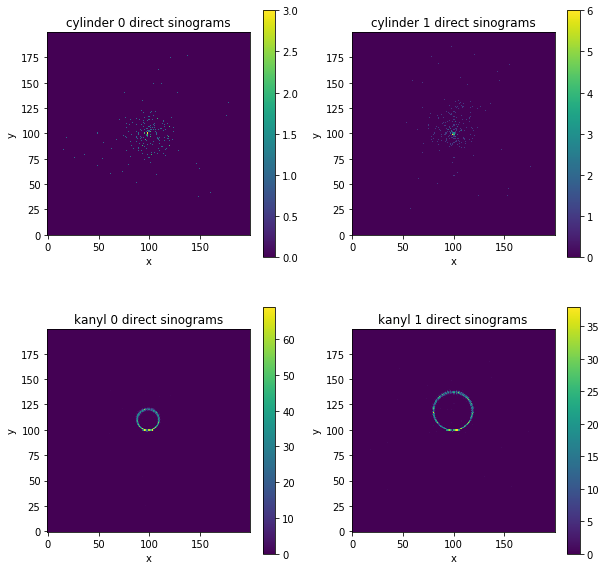

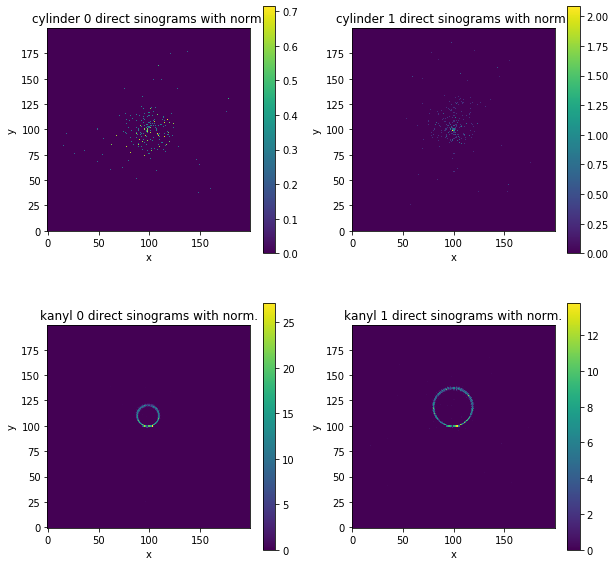

[ True False False]
